# DS51 — Regional Growth Analysis

**Member Assigned:** BERNABE, Rabelais
**Task Name:** Regional Growth Analysis

## Task Description
Measure economic growth trends per region by computing year-over-year (YoY) growth rates and compound annual growth rate (CAGR). Focus on constant-price GRDP to remove inflation effects and identify which regions are expanding faster over time.

## Expected Outputs
- Table of YoY growth rates per region
- CAGR summary table
- Identification of fast-growing and slow-growing regions
- Trend visualization (line chart of GRDP over time)
- Interpretation of regional growth patterns

## Dataset: REGIONAL ECONOMIC MAGNITUDE (Regional Level)


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Directory Setup
try:
    BASE_DIR = Path(__file__).resolve().parents[2]
except NameError:
    cwd = Path.cwd().resolve()
    if (cwd / '03_Cleaned_Data').exists():
        BASE_DIR = cwd
    elif (cwd.parent / '03_Cleaned_Data').exists():
        BASE_DIR = cwd.parent
    else:
        BASE_DIR = cwd.parents[1] if len(cwd.parents) > 1 else cwd

CLEAN_DIR = BASE_DIR / '03_Cleaned_Data'
OUT_TABLES = BASE_DIR / 'outputs' / 'tables'
OUT_FIGS = BASE_DIR / 'outputs' / 'figures'

OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

print(f'BASE_DIR: {BASE_DIR}')
print(f'CLEAN_DIR: {CLEAN_DIR}')
print(f'OUT_TABLES: {OUT_TABLES}')
print(f'OUT_FIGS: {OUT_FIGS}')

BASE_DIR: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS
CLEAN_DIR: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\03_Cleaned_Data
OUT_TABLES: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\tables
OUT_FIGS: C:\Users\PC\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\figures


In [47]:
# Load CSV (auto-detect)
csv_files = list(CLEAN_DIR.glob("*.csv"))
if not csv_files:
    raise FileNotFoundError(f"No CSV file found in {CLEAN_DIR}")
else:
    csv_file = csv_files[0]
    print(f"Loading CSV file: {csv_file.name}")

df = pd.read_csv(csv_file)

# Keep only constant-price GRDP
df = df[df['Price_Type'].str.contains('Constant')].copy()


Loading CSV file: Dataset 1 Regional_Economic_Magnitude (CLEANED).csv


In [48]:
# Year-over-Year (YoY) Growth
df['YoY_Growth'] = df.groupby('Region')['Total_GRDP'].pct_change() * 100

yoy_table = df.pivot(index='Year', columns='Region', values='YoY_Growth')
yoy_table.to_csv(OUT_TABLES / 'DS51_regional_economic_magnitude_YoY_Growth_Per_Region.csv')
print("YoY table saved!")

YoY table saved!


In [49]:

# CAGR per Region (Fastest & Slowest) with header

# Identify fastest and slowest growing regions
cagr_numeric = cagr_table.copy()
cagr_numeric['CAGR_num'] = cagr_numeric['CAGR (%)'].str.rstrip('%').astype(float)

fastest = cagr_numeric.sort_values('CAGR_num', ascending=False).head(3)
slowest = cagr_numeric.sort_values('CAGR_num').head(3)

# Function to print table with header
def print_cagr_table(title, df):
    print(title)
    print(f"{'Region':<50} {'CAGR %':<10}")  # Header
    print("-"*62)
    for idx, row in df.iterrows():
        print(f"{row['Region']:<50} {row['CAGR (%)']:<10}")
    print("\n")

# Print
print_cagr_table("Fastest growing regions:", fastest)
print_cagr_table("Slowest growing regions:", slowest)


Fastest growing regions:
Region                                             CAGR %    
--------------------------------------------------------------
Northern Mindanao                                  6.05%     
Cordillera Administrative Region                   5.83%     
Davao Region                                       5.70%     


Slowest growing regions:
Region                                             CAGR %    
--------------------------------------------------------------
Western Visayas                                    2.89%     
Eastern Visayas                                    4.41%     
National Capital Region                            4.50%     




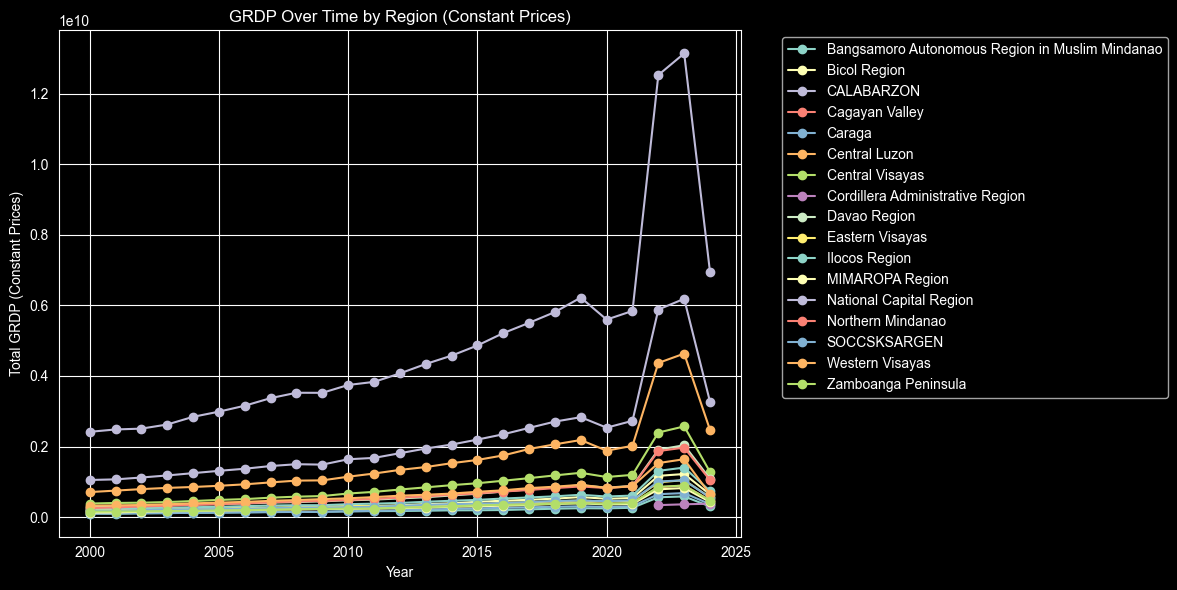

Trend chart saved!


In [50]:
# Trend Visualization
plt.figure(figsize=(12, 6))
for region in df['Region'].unique():
    region_df = df[df['Region'] == region]
    plt.plot(region_df['Year'], region_df['Total_GRDP'], marker='o', label=region)

plt.title('GRDP Over Time by Region (Constant Prices)')
plt.xlabel('Year')
plt.ylabel('Total GRDP (Constant Prices)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig(OUT_FIGS / 'DS51_regional_economic_magnitude_GRDP_Trend_Per_Region.png')
plt.show()
print("Trend chart saved!")